In [1]:
import pandas as pd
import numpy as numpy
from scipy import stats
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [ ]:
PROJETO 2 - GRUPO 12
- Alexandre Antar
- Guilherme Caproni
- Ricardo Israel

    Atualmente, o preço dos teclados varia de uma forma gritante. É possível ver isso através da nossa base de dados que coletamos dentro do Kaggle, que compara o preço de todos os teclados vendidos no site da Amazon em função de várias características.
    Dentre elas estão: o preço em que cada teclado está sendo vendido (Price); A quantidade de lojas físicas que ele está sendo vendido (Stores); A nota média que os usuários atribuiram à ele (Rating); A quantidade de pessoas que avaliaram o produto (Votes); O que o teclado contém (Type); As conexões que o teclado suporta (Connention); O mecanismo de acionamentos das molas do teclado (Switches).

    Sendo assim, o objetivo do nosso projeto é prever um preço de um teclado de acordo com todas as características dele, e, com isso, ser mais acessível para todos os usuários.
    Com essa base de dados e com técnicas de regressão, que se prestam a este tipo de análise, será possível obter resultados do nosso projeto e chegar em respostas sobre o quanto cada característica do teclado influencia no seu preço.

Mineiração

A primeira parte do projeto consiste em ler a base da dados e fazer uma análise com os valores encontrados afim de observar as principais variaveis.

In [2]:
dados=pd.read_csv("all_keyboards.csv")

In [3]:
dados

,Unnamed: 0,Name,Price,Stores,Rating,Votes,Type,Connection,Colors,Switches
0,0,Philips K264,7.50,41,4.7,6,Keyboard Only,USB,0,NaN
1,1,Philips SPT6324 Black,9.99,20,4.1,25,Keyboard and Mouse Set,USB,0,NaN
2,2,Philips SPT6224 Black,8.93,37,4.7,3,Keyboard and Mouse Set,USB,0,NaN
3,3,Logitech MX Keys,106.44,8,4.5,8,Keyboard Only,Bluetooth / USB,0,NaN
4,4,Powertech PT-677,3.99,68,2.7,7,Keyboard Only,USB,0,NaN
...,...,...,...,...,...,...,...,...,...,...
1265,1265,Esperanza TK105,6.80,9,1.0,1,NaN,NaN,0,Membrane
1266,1266,Keep Out F90E Gaming USB,39.90,6,2.3,6,NaN,NaN,0,Membrane
1267,1267,Gigabyte K8100,75.00,0,0.0,0,NaN,NaN,0,Membrane
1268,1268,Approx Quasar,29.00,0,1.0,1,NaN,NaN,0,Membrane


In [4]:
dados.describe()

,Unnamed: 0,Price,Stores,Rating,Votes,Colors
count,1270.00000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000
mean,634.50000,51.395740,7.303937,2.250315,11.619685,0.255906
std,366.76173,51.951831,18.979992,2.183142,73.741970,0.804749
min,0.00000,2.770000,0.000000,0.000000,0.000000,0.000000
25%,317.25000,15.425000,0.000000,0.000000,0.000000,0.000000
50%,634.50000,33.000000,3.000000,2.900000,1.000000,0.000000
75%,951.75000,65.332500,8.000000,4.500000,4.000000,0.000000
max,1269.00000,399.000000,247.000000,5.000000,914.000000,6.000000


In [5]:
#Excluindo as colunas Colors e Switches por não mostrarem uma importancia consideravél para a analise
cor=dados.drop(['Colors','Switches'],axis=1)
cor.isnull().sum()

Unnamed: 0      0
Name            0
Price           0
Stores          0
Rating          0
Votes           0
Type          698
Connection    698
dtype: int64

In [6]:
#Retirando do dataset teclados com 0 de analise e tranformando uma variavel qualitativa em quantitativa para a analise
clear_rating= cor['Rating']!=0.0
rating=cor.loc[clear_rating,:]
trocar1=rating.Type.replace(['Keyboard Only','Keyboard and Mouse Set','Keyboard with Touchpad'],[1,2,3],inplace=True)
rating['Type'].fillna("0",inplace=True)
rating

,Unnamed: 0,Name,Price,Stores,Rating,Votes,Type,Connection
0,0,Philips K264,7.50,41,4.7,6,1,USB
1,1,Philips SPT6324 Black,9.99,20,4.1,25,2,USB
2,2,Philips SPT6224 Black,8.93,37,4.7,3,2,USB
3,3,Logitech MX Keys,106.44,8,4.5,8,1,Bluetooth / USB
4,4,Powertech PT-677,3.99,68,2.7,7,1,USB
...,...,...,...,...,...,...,...,...
1263,1263,Omega Varr VK-1,15.00,0,3.0,4,0,NaN
1264,1264,A4Tech Bloody & Sades Gaming set,156.07,0,1.0,2,0,NaN
1265,1265,Esperanza TK105,6.80,9,1.0,1,0,NaN
1266,1266,Keep Out F90E Gaming USB,39.90,6,2.3,6,0,NaN


In [7]:
#Conta o número de teclado que tem o número de lojas igual a zero, e após observar o valor decidimos por não retirar do dataset já que apresentam rating e por correspoderem a um valor menor do que 20% do total de teclados.
stores_0=rating['Stores']==0
stores_0.value_counts()


False    547
True     138
Name: Stores, dtype: int64

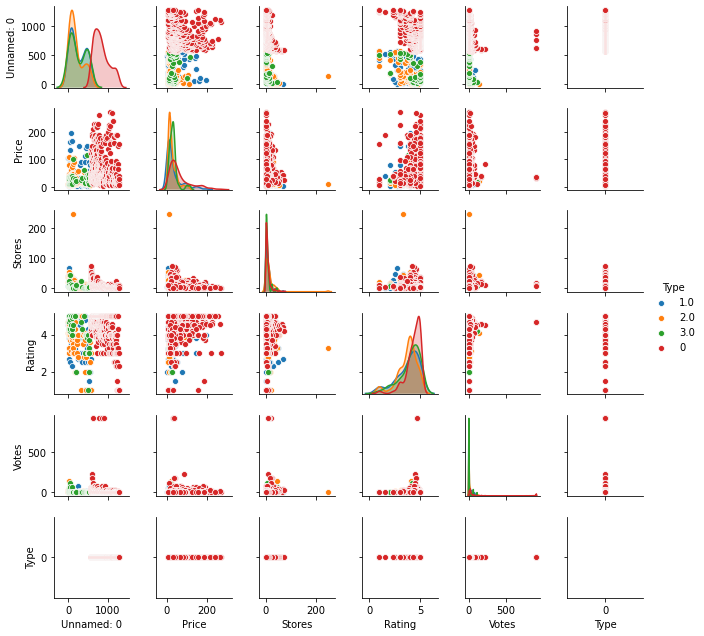

In [8]:
sns.pairplot(rating,height=1.5,hue='Type')

Inicio das analises:
Após transformar o dataset puramente em valores qualitativos que podem ser trabalhados, vamos ao inicio das analises que tem por finalidade crir um modelo capaz de prever o valor de um teclado levando em conta seu rating,numero de lojas e tipo de equipamento 

In [9]:
#Dividindo em duas planilhas para teste e treinamento 
y=rating['Price']
x=rating[['Stores','Rating','Type']]
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.3,random_state=1)

Regressão Multipla

A regressão multipla consiste em uma regressão linear mas com mais de um valor independente, logo ela tenta prever o valor de algo baseado em duas ou mais variaveis.
O modello funciona criando uma espécie de padrão com os dados analisados visando prever o valor de algum dado quantitativo.

In [23]:
import statsmodels.api as sm 

def regress (y,x):
    xc=sm.add_constant(x)
    model=sm.OLS(y,xc.astype(float))
    resultado=model.fit()
    return resultado

Após observar a tabela de resultados utilizando todas as variaveis quantitativas percebe-se que a variavel Votes não tem influencia no valor do teclado por apresentar um valor de P>t maior que o alpha de 0.1, Logo afim de prever melhor o valor do equipamento foi retirado da analise.

In [24]:
rating['Type']=pd.to_numeric(rating['Type'])

In [25]:
#Executando a função
resultado2=regress(Y_train,X_train)
resultado2.summary()
#Colocar a infos importantes

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     22.35
Date:                Tue, 24 Nov 2020   Prob (F-statistic):           1.50e-13
Time:                        22:00:13   Log-Likelihood:                -2513.7
No. Observations:                 479   AIC:                             5035.
Df Residuals:                     475   BIC:                             5052.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.8446     10.721      1.944      0.052      -0.222      41.911
Stores        -0.2698      0.136     -1.979      0.048      -0.538      -0.002
Rating         9.8374      2.398      4.103      0.000       5.126      14.549
Type         -12.3313      2.329     -5.295      0.000     -16.907      -7.755
==============================================================================
Omnibus:                      159.385   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              408.152
Skew:                           1.675   Prob(JB):                     2.35e-89
Kurtosis:                       6.039   Cond. No.                         94.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

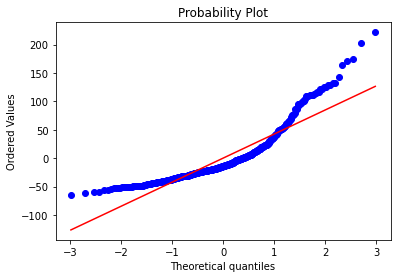

In [26]:
stats.probplot(resultado2.resid,dist="norm",plot=plt);
#Ao analisar os residos pode-se observar que eles não lineares.


Conforme visto em aula ao utilizar o modelo deveriamos observar os residuos lineares, já que os resultados obtidos fogem disso, funciona como um indicador que talvez esse modelo probabilístico não seja o mais indicado para o dataset em questão

In [27]:
x_dados=sm.add_constant(X_test)
resultado2.predict([])


TypeError: can't multiply sequence by non-int of type 'float'

In [ ]:
resultado2.accuracy_score(x_dados,Y_test)

#Regression Tree:


O modelo probabilistico de regression tree tem como objetivo subdividir os dados do dataset os agrupando por semelhança entre eles.
Para isso o algoritimo é dividio em perguntas que ele faz para o dado, que são respondidas com sim ou não,para assim tomar a decisão de colocalo em tal grupo ou outro, os separando conforme as respostas
Cada decisão da árvore é feita com base no coeficiente de Gini, que varia conforme a probabilidade  de ocorrer um determinado evento, quanto maior o indice maior a impureza da amostra.


In [36]:
#Criando a arvore, utilizando a função DecisionTreeRegressor.
clf=tree.DecisionTreeRegressor(max_depth=5)
clf=clf.fit(X_train,Y_train)


In [37]:

clf.score(X_test,Y_test)
#Valor encontrado negativo mostrando que o modelo tem uma performance péssima, já que os valores do score deveriam ser entre 0 e 1 tendo 1 como 100% de accuracy entre o modelo e a base.

0.13439874708404065

In [ ]:
O valor encontrado acima mostra que o modelo 

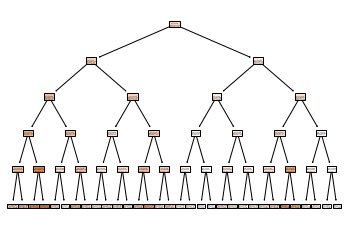

In [40]:
#Plotando a árvore.
tree.plot_tree(clf,filled=True);


Conclusão:

Após aplicação de deus tecnicas diferentes de regressão pode-se observar que os o metodo de regressão não é o mais aconselhado para o dataset escolhido, já que nem a regressão multipla ou a árvore de decisão se mostraram boas tecnicas para prever o preço do teclado.
Com os resultados, ainda fomos capazes de encontrar erros em nosso modelo e possiveis iterações futuras como por exemplo:nome da marca, o dataset escolhido não levava em consideração a marca do produto, como em qualquer outro ramo o nome que a marca carrega impacta diretamente na quantitade de vendas, avaliação e qualidade do produto, mesmo após tentarmos criar colunas para as principais marcas (não colocado no modelo), o modelo não respondeu e permaneceu igual ou até por vezes piorou quando deveria aumentar o valor do produto.

Com isso o nosso target de prever o valor de um teclado afim de checar se o mesmo estava no valor condizente com o mercado não foi possivel de ser atingido já que o dataset não favorecia para tal.

Pensando no futuro talvez a melhor maneira seria realmente manualmente testar marca por marca e ajustar a importância de forma manual ou ir mais além e deter uma base de dados mais precisa sobre a importância real do nome da marca na hora da precificação do teclado, outro fator é tambem o preço de custo que pode variar bastante e a qualidade do produto já que marcas mais Tops tendem a ter podutos de mais qualidade que aumenta o preço de custo e impacta para o cliente.

Destarte, com a análise fomos capazes de comcluir uma coisa muito importante, utencilios como teclados onde é extremamente pessoal os gostos e o mercado é gigantesco um simple modelo matematico não seria capaz de prever os valores, talvez com implementação de algo como um machine learning ou AI para entender os gostos e saber dar a devida importância para coisas que os dados não mostram como qualidade e branding.



#Com os resultados da regression tree pode-se comcluir que o dataset escolhido sofre de overfit, o que significa que o modelo criado funciona tão perfeitamente para o dataset em especifico que não pode ser aplicado para analisar qualquer outro dataset sobre o mesmo tema.
#Logo o metodo decision tree não seria o mais aconselhado de se utilizar nesta base de dados já que não seriamos capazes de atingir o target que é de pegar qualquer teclado disponivel no mercado e prever o seu valor.